In [17]:
import torch
import torchvision
import torch.nn.functional as F
from torch.autograd import variable
import matplotlib.pyplot as plt

torch.manual_seed(1)

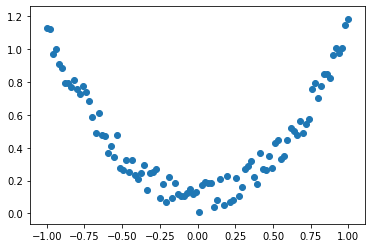

In [22]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  #一维变为二维数据
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x, y)
plt.show()


In [23]:
# method  快速创建 并保存神经网络

def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1),
    )
    
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.2)
    loss_func = torch.nn.MSELoss()  #均方差回归问题
    # loss_func = torch.nn.CrossEntropyLoss()  #多分类问题，相当于softmax
    
    for i in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()   #优化   反向传播
        loss.backward()
        optimizer.step()

    torch.save(net1, 'net1.pkl')                     #保存整个神经网络
    torch.save(net1.state_dict(),'net1_params.pkl')  #只保存所有参数
    
    
    plt.figure(1, figsize=(10,3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.detach().numpy(), prediction.detach().numpy(), '-r', lw=5)

In [24]:
#    提取保存的神经网络

def load_net():
    net2 = torch.load('net1.pkl')
    prediction = net2(x)

    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.detach().numpy(), prediction.detach().numpy(), '-r', lw=5)
    plt.show()
    
def load_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1),
    )
    net3.load_state_dict(torch.load('net1_params.pkl'))
    prediction = net3(x)

    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.detach().numpy(), prediction.detach().numpy(), '-r', lw=5)
    plt.show()
    

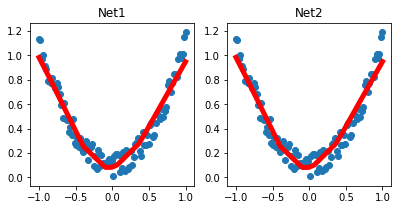

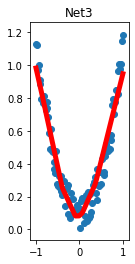

In [25]:
save()

load_net()

load_params()











